In [2]:
# Importando as bibliotecas necessárias
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Carregando a base de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizando os dados de imagem para o intervalo [0, 1]
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

# Convertendo os rótulos para o formato one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Criando a rede neural multicamadas
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando o modelo
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1)

model.save('mnist_model.keras')

# Avaliando o modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Acurácia: %.2f%%" % (scores[1]*100))

Epoch 1/10


d:\GtiHub\ProjetosPessoais\redeNeuralArtificial\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8833 - loss: 0.3986
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9747 - loss: 0.0827
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9850 - loss: 0.0481
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0338
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9906 - loss: 0.0286
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9939 - loss: 0.0194
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9935 - loss: 0.0188
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9956 - loss: 0.0138
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0105
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9948 - loss: 0.0143
Acurácia: 97.74%


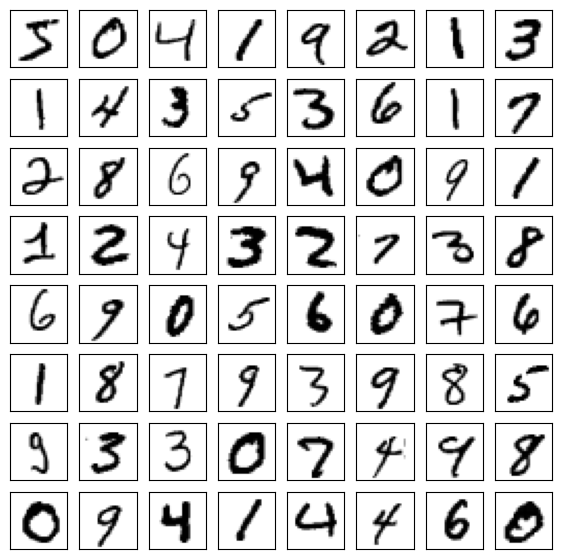

In [5]:
import matplotlib.pyplot as plt

# Carregando a base de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Plotando as primeiras 64 imagens
plt.figure(figsize=(7,7))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = load_model('mnist_model.keras')

# Carregar a imagem
img = load_img('quatro.jpg', color_mode='grayscale', target_size=(28, 28))

# Converter a imagem para um array numpy e normalizar para o intervalo [0, 1]
img = img_to_array(img).reshape(1, 784).astype('float32') / 255

# Fazer a previsão
pred = model.predict(img)

# A previsão é um vetor de 10 elementos com as probabilidades para cada dígito
# Para obter o dígito previsto, pegamos o índice do elemento com a maior probabilidade
digit = pred.argmax()
print("Dígito previsto:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Dígito previsto: 5
